# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

### **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


### Made by Armando Rodriguez Ramos and Hassnanin Shafqat

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
HussPath = '/content/drive/MyDrive/MAI/CV/Lab 2/images/'
ArmandoPath = '/content/drive/MyDrive/UNIVERSITAT/Master/1-1/CV/LabsCV/2/images/'

# Use the path where your images folder is located
path = ArmandoPath

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, io
from skimage.color import rgb2gray
from skimage.exposure import histogram, equalize_hist
from skimage.morphology import disk, square, rectangle, star, diamond
from skimage.filters.rank import mean

In [4]:
# Auxiliar handcrafted function to plot n images easily
def plot_images(images, size, width=0, height=0, limits=[], titles=[]):
  assert len(images) == len(limits) or limits == [], "Define a number of limits according to the number of images"
  if not width : width  = len(images)
  if not height: height = 1
  fig, axs = plt.subplots(height,width,figsize=size)
  for idx,image in enumerate(images):
    if width != 1 and height != 1:
      axs = axs.flatten()
    ax = axs if width == 1 and height == 1 else axs[idx]
    lim = limits[idx] if limits != [] else (0,255)
    title = titles[idx] if titles != [] else None
    ax.imshow(image, cmap='gray', vmin = lim[0], vmax = lim[1])
    ax.set_title(title)
    ax.set_xticks([]); 
    ax.set_yticks([])

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![black_and_white_patches.png](https://drive.google.com/uc?export=view&id=1Iuf870gS6DuFzMtnXs53DLuiXy0oARaw)



In [5]:
a = np.ones((100,100))
b = np.ones((100,100))
c = np.zeros((100,100))
a[:,:len(a)//2] = 0
b[:len(b)//2,:] = 0
c[:len(c)//2,:len(c)//2] = 1

*   Visualize the created images in a 1 x 3 subplot using matplotlib.

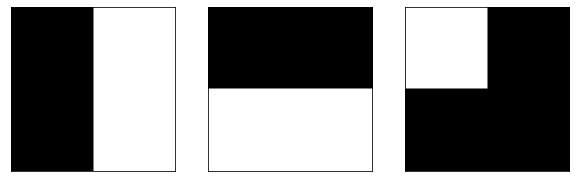

In [6]:
plot_images([a,b,c], (10,8), limits=[(0,1)]*3)

*   Use the above three images to create the following image

![color_patches.png](https://drive.google.com/uc?export=view&id=1UxmFHToC4TUjgtB7UQMbB3DM3RIZlgBZ)

*Hint: Remember channels and color spaces*

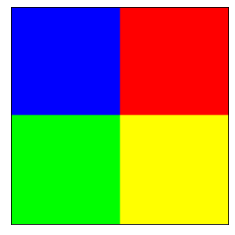

In [7]:
red, green, blue = a, b, c
result = np.empty((100,100,3))
result[:,:,0] = red
result[:,:,1] = green
result[:,:,2] = blue
plot_images([result],(7,4))

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![sillas.jpg](https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG)



In [8]:
sillas_image = io.imread(path+'sillas.jpg')

*   Extract individual channels and plot them using matplotlib subplot.

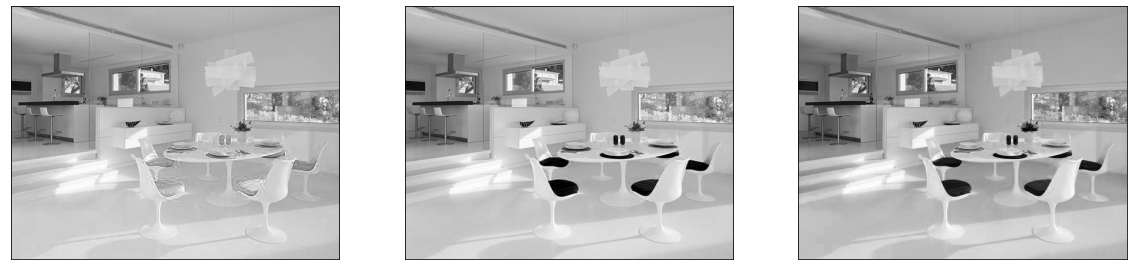

In [9]:
red   = sillas_image[:,:,0]
green = sillas_image[:,:,1]
blue  = sillas_image[:,:,2]
plot_images([red,green,blue],(20,15))

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

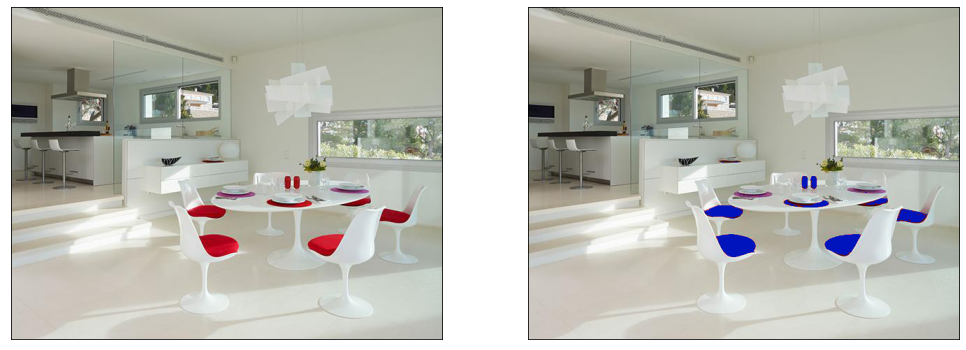

In [10]:
red_threshold  = 120
zero_threshold = 100
sillas_image_copy = sillas_image.copy()
mask = (red > red_threshold) & (green < zero_threshold) & (blue < zero_threshold)
sillas_image_copy[mask] = [0,20,190] # A blue color of choice
plot_images([sillas_image,sillas_image_copy],(17, 12))

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).


In [11]:
model = io.imread(path+'model.png')
coat = io.imread(path+'coat.png')

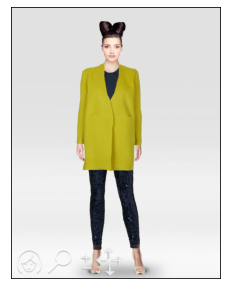

In [12]:
modelYellow = model.copy()
mask = coat > 0
modelYellow[mask] = coat[mask]
plot_images([modelYellow],(5,5))

*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.

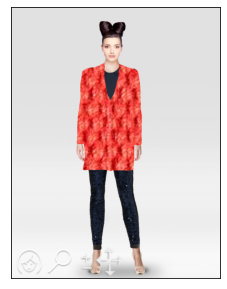

In [13]:
texture = io.imread(path+'texture2.png')
mask = coat[:,:,:3] > 0
modelTexture = model.copy()
modelTexture[:,:,:3][mask] = texture[mask]
plot_images([modelTexture],(5,5))

*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![model_and_coat.png](https://drive.google.com/uc?export=view&id=1DOieJOrfwe34z0-3EEBVyX1Ac45sb5SN)

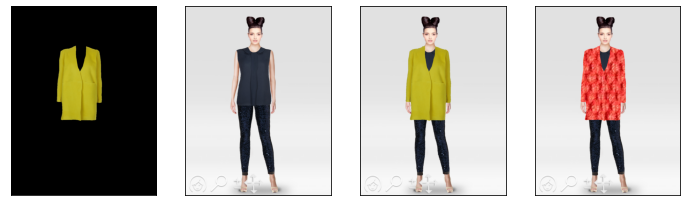

In [14]:
plot_images([coat,model,modelYellow,modelTexture],(12,10))

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




<BarContainer object of 256 artists>

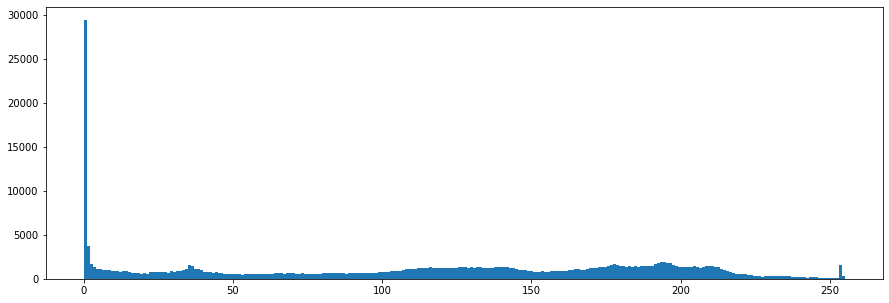

In [15]:
astronaut_image = data.astronaut()
astronaut_image_gray = rgb2gray(astronaut_image)*255
astronaut_image_gray_histogram = histogram(astronaut_image_gray)

fig, axs = plt.subplots(1,1,figsize=(15,5))
axs.bar(astronaut_image_gray_histogram[1],
        astronaut_image_gray_histogram[0],width=1)

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

<BarContainer object of 8 artists>

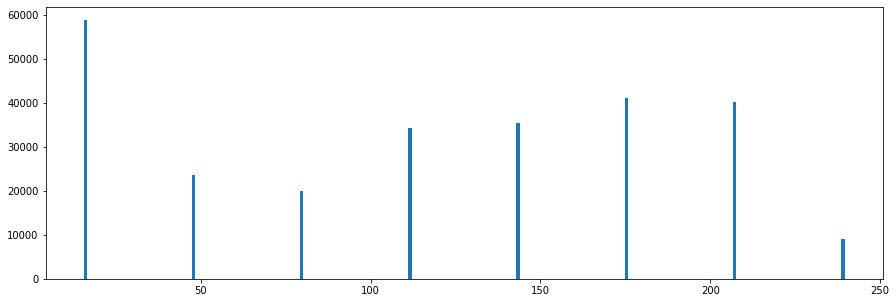

In [16]:
astronaut_image_gray_histogram_8 = histogram(astronaut_image_gray, nbins=8)
fig, axs = plt.subplots(1,1,figsize=(15,5))
axs.bar(astronaut_image_gray_histogram_8[1],
        astronaut_image_gray_histogram_8[0],width=1)

*   **What happens when you change the bin count?**

> When we change the bin count, the histogram change the number of vertical bars that shows. Those bars represent more or less data depending on the amount of bars we have. Thus, if we have many bars we will have a lot of precision and if we have an small number of bars we will have a lot of generalization. 

* **Does your inference change based on the bin count? If yes, then how do you define the correct bin count.**

> Yes, as we can see on the previous images, it changes a lot. Defining the correct bin count is not an easy task because it depend on the data we have. However, we can use the rice rule which can gives a good estimation of the number of bins. The Rice’s rule is defined as: (cube root of the number of observations) * 2.  
In our case, the number of observations is 262.144, hence, the number of bins using the rice rule is 128. If we observe the image below, we can appreciate that it is very similar to the first histogram we created.


The number of observations: 262144
Number of bins: 128


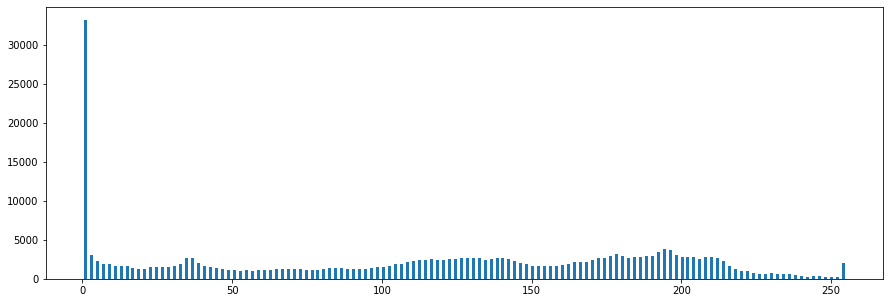

In [17]:
print(f"The number of observations: {np.sum(astronaut_image_gray_histogram[0])}")
bins = round((np.sum((astronaut_image_gray_histogram[0]))**(1/3))*2)
print(f"Number of bins: {bins}")
astronaut_image_gray_histogram_bins = histogram(astronaut_image_gray, nbins=bins)
fig, axs = plt.subplots(1,1,figsize=(15,5))
axs.bar(astronaut_image_gray_histogram_bins[1],
        astronaut_image_gray_histogram_bins[0],width=1)
plt.show()


*   **What happens when the bin count is very low and what happens when it is very high?**

> On the one hand, if we reduce the bin count, we are packing more values in the same bin, hence, we are reducing the precision. One the other hand, if we increase the bin count, less values are contained in every bin, thus increasing the precision provided by the histogram. However, if we increase too much the number of bins, we may get more "noise" in our histogram or a big lose on the ability to generalize with it.


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


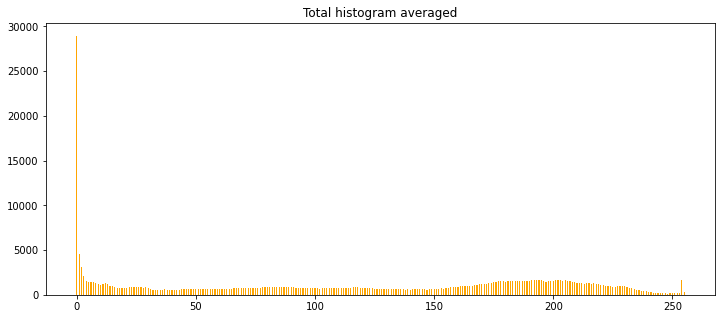

In [18]:
values_red, bins_red     = histogram(astronaut_image[:,:,0])
values_green, bins_green = histogram(astronaut_image[:,:,1])
values_blue, bins_blue   = histogram(astronaut_image[:,:,2])

# We divided by 3 to have the histogram in a similar scale as the channel histograms
values_total = (values_red+values_green+values_blue)/3
bins_total   = bins_red # The bins remain the same

fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.set_title("Total histogram averaged")
ax.bar(bins_total, values_total, color="orange", width=0.5)
plt.show()

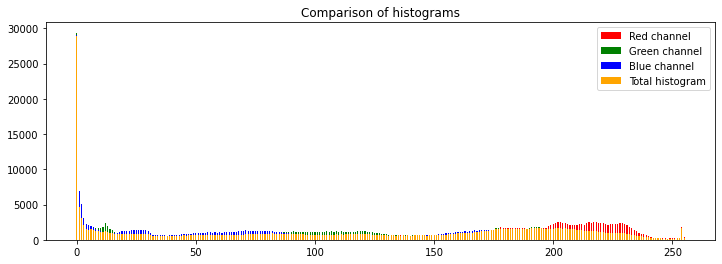

In [19]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.set_title("Comparison of histograms")
ax.bar(bins_red, values_red, width=0.5, color='red', label="Red channel")
ax.bar(bins_green, values_green, width=0.5, color='green',label="Green channel")
ax.bar(bins_blue, values_blue, width=0.5, color='blue',label="Blue channel")
ax.bar(bins_total, values_total, width=0.5, color='orange', label="Total histogram")
ax.legend()
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.


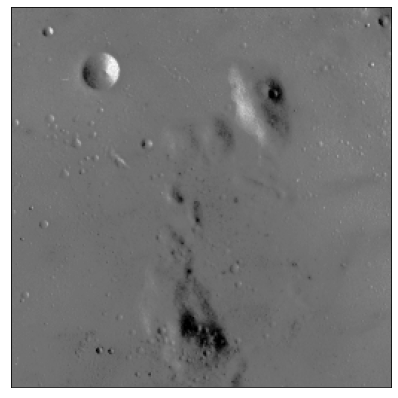

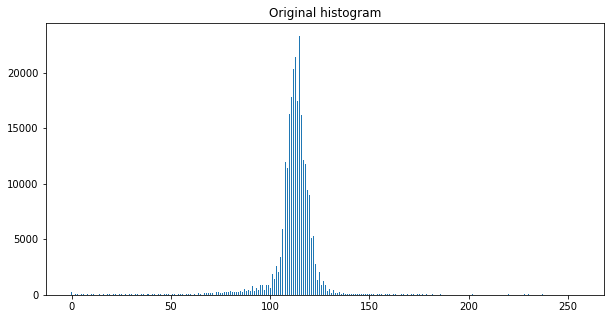

In [20]:
# We decided to use the moon picture which a better enhancing is produced
moon_gray = data.moon()

plot_images([moon_gray],(7,7))
moon_gray_values, moon_gray_bins = histogram(moon_gray)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title("Original histogram")
ax.bar(moon_gray_bins, moon_gray_values, width=0.5)
plt.show()

*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.


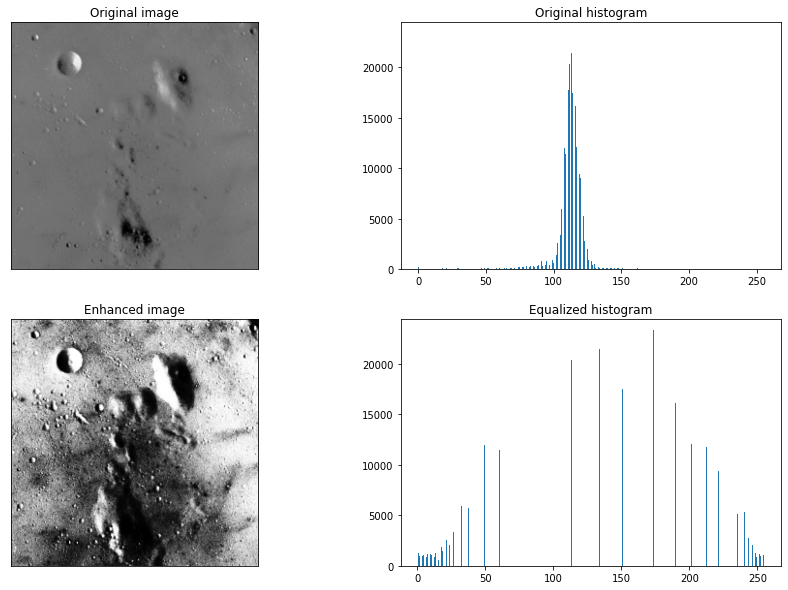

In [21]:
moon_equalized = equalize_hist(moon_gray)*255
moon_equalized_values, moon_equalized_bins = histogram(moon_equalized)

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0][0].set_title("Original image")
axs[0][0].set_xticks([]); axs[0][0].set_yticks([])
axs[0][0].imshow(moon_gray, cmap='gray')

axs[1][0].set_title("Enhanced image")
axs[1][0].set_xticks([]); axs[1][0].set_yticks([])
axs[1][0].imshow(moon_equalized, cmap='gray')

axs[0][1].set_title("Original histogram")
axs[0][1].bar(moon_gray_bins, moon_gray_values, width=0.5)

axs[1][1].set_title("Equalized histogram")
axs[1][1].bar(moon_equalized_bins, moon_equalized_values, width=0.5)

plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?

> On the one hand, the goal of linear contrast stretch is increasing the difference between an image's maximum and least intensity pixels value. All other intensity values ​​are distributed over this interval.
On the other hand, histogram equalization consists of adjusting the intensity values ​​of all the pixels in the image so that the histogram distribution looks more similar.

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [22]:
def linear_contrast_stretch(image, nbins):
  image = image.astype("float32")
  imageMin, imageMax = 80, 150

  image_new = (image-imageMin)/(imageMax-imageMin) * nbins
  image_new = np.clip(image_new, 0, 255)

  return image_new

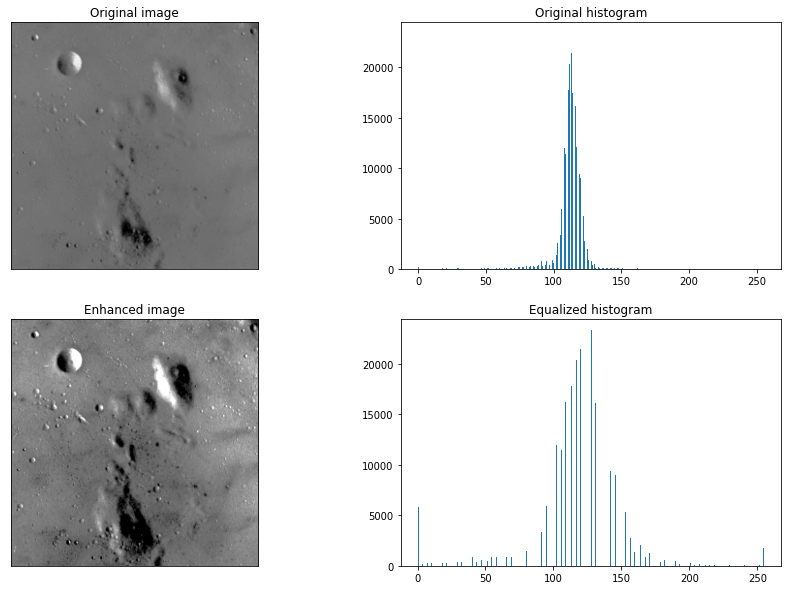

In [23]:
moon_gray_equalized = linear_contrast_stretch(moon_gray, nbins=255)

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0][0].set_title("Original image")
axs[0][0].set_xticks([]); axs[0][0].set_yticks([])
axs[0][0].imshow(moon_gray, cmap='gray')

axs[1][0].set_title("Enhanced image")
axs[1][0].set_xticks([]); axs[1][0].set_yticks([])
axs[1][0].imshow(moon_gray_equalized, cmap='gray', vmin=0, vmax=255)

axs[0][1].set_title("Original histogram")
axs[0][1].bar(moon_gray_bins, moon_gray_values, width=0.5)

moon_gray_equalized_values, moon_gray_equalized_bins = histogram(moon_gray_equalized, nbins=256)
axs[1][1].set_title("Equalized histogram")
axs[1][1].bar(moon_gray_equalized_bins, moon_gray_equalized_values, width=0.5)

plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




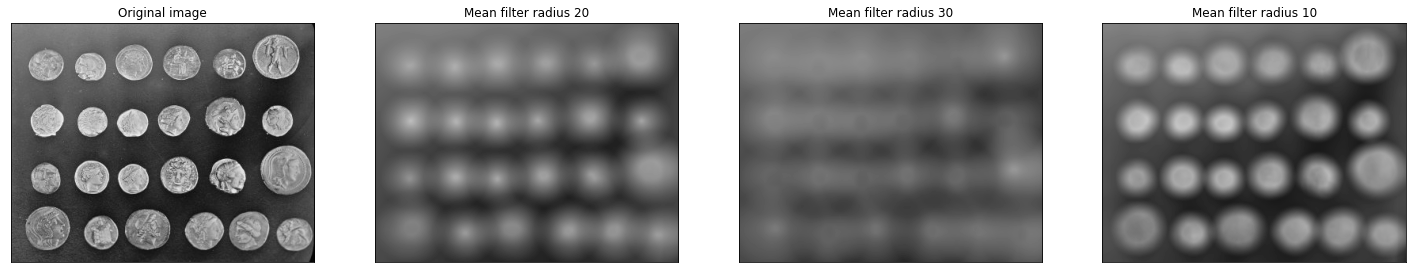

In [24]:
coins = data.coins()
radius = 20
disk_20 = disk(radius)
image_mean_radius = mean(coins, disk_20)
diskPlus10 = disk(radius + 10)
image_mean_RP10 = mean(coins, diskPlus10)
diskMinus10 = disk(radius - 10)
image_mean_RM10 = mean(coins, diskMinus10)
plot_images([coins, image_mean_radius, image_mean_RP10, image_mean_RM10], (25,25), 
            titles=["Original image","Mean filter radius 20","Mean filter radius 30","Mean filter radius 10"])

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

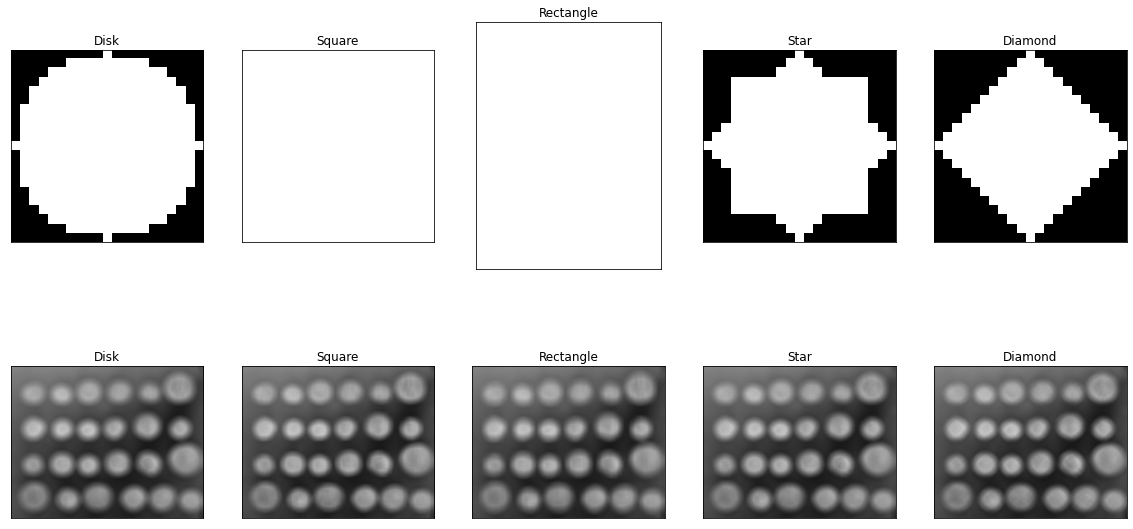

In [25]:
# We decided to use a similar radius to all the selems considering their form
# Per example, to achieve a radius 10 disk with an square it will be a square of size 20 
# But we decided to use 15 to avoid taking too much information from out the coins

names = ["Disk","Square","Rectangle","Star","Diamond"]*2

square_selem = square(15)
image_mean_square = mean(coins, square_selem)

# We tested different sizes for the rectangle
rectangle_selem = rectangle(20, 15)
image_mean_rectangle = mean(coins, rectangle_selem)

# The value of the star (7) is half the square inside size
star_selem = star(7)
image_mean_star = mean(coins, star_selem)

diamond_selem = diamond(10)
image_mean_diamond = mean(coins, diamond_selem)

limits = [(0,1)]*5 + [(0, 255)]*5
plot_images([diskMinus10, square_selem, rectangle_selem, star_selem, diamond_selem,
             image_mean_RM10, image_mean_square, image_mean_rectangle, image_mean_star, image_mean_diamond], (20,10), 
             width = 5, height = 2, limits = limits, titles = names)

*  **How does changing the radius of disk affect the smoothing functionality?**

> When we increase the radius of the disk, the smoothing effect is bigger because the filter affects more pixels and the perturbation in the middle pixel is, consequently, bigger. If we reduce the radius we are focusing more on the closest pixels, hence obtaining a less smoothing effect.

*   **What is the observed behaviour with difference in the structuring element**

> We can notice a bit that, as we are dealing with an image of coins (which are disks), the element perturbates more the original image when the shape of it didn't resemble the one in a disk. We can notice that effect per example comparing the blurring produced by the rectangle, which is quite a lot, and the one produced by the star, which didn't look as bad and didn't change the original circular form of the coins.

*   **What is the difference between mean filter and gaussian filter?**

> The main difference between the mean filter and the gaussian filter is that the mean filter uses ones in the filter to compute the average of all those pixels, while the gaussian filter uses a gaussian distribution values instead of ones to compute a weighted average among the pixels. This last one gives more importance to the pixels that are closest to the center, which is a logical thought when trying to blur or smooth an image and delete the noise on it.

*   **Where do you use mean filters and where do you use gaussian filters?**

> The first thing we have to mention is that mean and gaussian filter return really similar results if we are talking about deleting noise from an image. Both of them are low-pass filters but gaussian filters are much better at separating those frequencies. Even so, mean filters are much faster than gaussians, so it will depend on the type of task you are doing to select one or the other.


---

## **End of P2: Image operators and filters**

Deadline for P2 submission in CampusVirtual is: **Thursday, the 6th of October, 2022**
